# Ex4

截止日期：11月17日

以学号+姓名(4)的命名形式打包实验代码+实验报告发送到邮箱2120230658@mail.nankai.edu.cn

## 数据集
Most Popular Data Set中的wine数据集（对意大利同一地区声场的三种不同品种的酒做大量分析所得出的数据）

### 基本要求
 a)采用分层采样的方式将数据集划分为训练集和测试集。
 
 b)给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

### 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

### 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

### 拓展要求
浅谈ROC曲线和AUC值作为分类评价的合理性。

### 基本要求

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Wine.data 包含所有数据的数据文件

Wine.names 数据集描述文件

在wine数据集中，这些数据包括了三种酒中13种不同成分的数量。

文件中，每行代表一种酒的样本，共有178个样本；一共有14列，其中，第一个属性是类标识符，分别是1/2/3来表示，代表葡萄酒的三个分类。后面的13列为每个样本的对应属性的样本值。剩余的13个属性是，酒精、苹果酸、灰、灰分的碱度、镁、总酚、黄酮类化合物、非黄烷类酚类、原花色素、颜色强度、色调、稀释葡萄酒的OD280/OD315、脯氨酸。

其中第1类有59个样本，第2类有71个样本，第3类有48个样本。


In [2]:
# 读取wine数据集
data = pd.read_csv(r'C:\\Users\\LENOVO\\Desktop\\ML-4\\wine.data', header=None, names=["class_label", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"])

In [3]:
# 特征列X和目标列y
X = data.iloc[:, 1:]  # 13个属性作为特征
y = data['class_label']

In [4]:
# 分层采样划分训练集和测试集
# 测试集的大小为总数据的20%，采用分层抽样以保持类别分布的一致性
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
# 定义高斯朴素贝叶斯分类器
class GaussianNaiveBayes:
    def __init__(self):
        self.class_labels = []
        self.class_priors = {}
        self.class_means = {}
        self.class_variances = {}

    def fit(self, X, y):
        self.class_labels = np.unique(y)

        for label in self.class_labels:
            X_class = X[y == label]#类别标签
            self.class_priors[label] = len(X_class) / len(X)#类别先验概率

            self.class_means[label] = X_class.mean(axis=0)#类别均值
            self.class_variances[label] = X_class.var(axis=0)#类别方差

    def predict(self, X):
        predictions = []
        for sample in X:
            posteriors = []
            # 计算输入数据中每个样本的各个类别的后验概率
            for label in self.class_labels:
                
                # 每个类别 likelihood = (1 / sqrt(2 * π * σ^2)) * exp(-(sample[i] - μ)^2 / (2 * σ^2))
                # 计算高斯分布的概率密度函数的指数：((sample - self.class_means[label]) ** 2) / (2 * self.class_variances[label])
                # 计算高斯分布的概率密度函数的系数：np.log(2 * np.pi * self.class_variances[label])
                # 将指数部分和系数部分相加，并取负数：-0.5 * np.sum(np.log(2 * np.pi * self.class_variances[label]) + ((sample - self.class_means[label]) ** 2) / (2 * self.class_variances[label]))
                # 计算似然概率：np.exp(-0.5 * np.sum(np.log(2 * np.pi * self.class_variances[label]) + ((sample - self.class_means[label]) ** 2) / (2 * self.class_variances[label])))
                
                likelihood = np.exp(-0.5 * np.sum(np.log(2 * np.pi * self.class_variances[label]) +
                                                 ((sample - self.class_means[label]) ** 2) / (2 * self.class_variances[label])))
                # posterior = likelihood * prior
                # 将似然概率与先验概率相乘，并取对数，得到后验概率：np.log(self.class_priors[label]) + np.sum(np.log(likelihood))
                posterior = np.log(self.class_priors[label]) + np.sum(np.log(likelihood))
                posteriors.append(posterior)
                
            predictions.append(self.class_labels[np.argmax(posteriors)])
        return np.array(predictions)

In [6]:
# 创建朴素贝叶斯分类器
nb_classifier = GaussianNaiveBayes()
# 将分类器拟合到训练数据上
nb_classifier.fit(X_train.values, y_train.values)

In [7]:
# 使用分类器在测试集上进行预测
y_pred = nb_classifier.predict(X_test.values)

In [8]:
# 将预测标签与真实标签进行比较并取比较结果的平均值来计算分类准确率
accuracy = np.mean(y_pred == y_test)
print(f'分类准确率: {accuracy:.4f}')

分类准确率: 0.9444


In [9]:
# 计算各个类别的分类准确率
classes_accuracy = {}
unique_labels = np.unique(y_test)
for label in unique_labels:
    correct = np.sum((y_test == label) & (y_pred == label))
    total = np.sum(y_test == label)
    classes_accuracy[label] = correct / total

# 打印各个类别的分类准确率
for label, acc in classes_accuracy.items():
    print(f'类别 {label} 的分类准确率: {acc:.4f}')

类别 1 的分类准确率: 1.0000
类别 2 的分类准确率: 0.8571
类别 3 的分类准确率: 1.0000


### 中级要求

In [10]:
#编写函数实现混淆矩阵、精度、召回率、F值

def calculate_metrics(y_true, y_pred):
    # 计算混淆矩阵
    unique_labels = set(y_true + y_pred)
    num_classes = len(unique_labels)
    confusion = [[0] * num_classes for _ in range(num_classes)]
    for true, pred in zip(y_true, y_pred):
        confusion[true][pred] += 1
    
    # 计算精度、召回率和F值
    precision = 0
    recall = 0
    f1 = 0
    
    for i in range(num_classes):
        true_positives = confusion[i][i]
        false_positives = sum(confusion[j][i] for j in range(num_classes) if j != i)
        false_negatives = sum(confusion[i][j] for j in range(num_classes) if j != i)
        
        precision += true_positives / (true_positives + false_positives)
        recall += true_positives / (true_positives + false_negatives)
        f1 += 2 * true_positives / (2 * true_positives + false_positives + false_negatives)
    
    precision /= num_classes
    recall /= num_classes
    f1 /= num_classes
    
    return confusion, precision, recall, f1

In [11]:
# 计算混淆矩阵、精度、召回率和F值
confusion = confusion_matrix(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

In [12]:
print(f'混淆矩阵:\n{confusion}')

print(f'精度: {precision:.4f}')

print(f'召回率: {recall:.4f}')

print(f'F值: {f1:.4f}')

混淆矩阵:
[[12  0  0]
 [ 2 12  0]
 [ 0  0 10]]
精度: 0.9524
召回率: 0.9444
F值: 0.9444


In [13]:
# 计算混淆矩阵
confusion_mat = confusion_matrix(y_test.values, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# 计算精度
precision = precision_score(y_test.values, y_pred, average=None)
print("Precision:")
for i in range(len(precision)):
    print(f"类别 {i}: {precision[i]}")

# 计算召回率
recall = recall_score(y_test.values, y_pred, average=None)
print("Recall:")
for i in range(len(recall)):
    print(f"类别 {i}: {recall[i]}")

# 计算F值
f1 = f1_score(y_test.values, y_pred, average=None)
print("F1 Score:")
for i in range(len(f1)):
    print(f"类别 {i}: {f1[i]}")

Confusion Matrix:
[[12  0  0]
 [ 2 12  0]
 [ 0  0 10]]
Precision:
类别 0: 0.8571428571428571
类别 1: 1.0
类别 2: 1.0
Recall:
类别 0: 1.0
类别 1: 0.8571428571428571
类别 2: 1.0
F1 Score:
类别 0: 0.923076923076923
类别 1: 0.923076923076923
类别 2: 1.0


### 高级要求

In [14]:
# 计算ROC曲线和AUC值

# 计算数据集中类别的数量
num_classes = len(data['class_label'].unique())

 存储每个类别的假阳性率（False Positive Rate，FPR）
 
 真阳性率（True Positive Rate，TPR）
 
 ROC曲线下的面积（Area Under the Curve，AUC）。

In [15]:
fpr = {}
tpr = {}
roc_auc = {}

 循环用于计算每个类别的FPR、TPR和AUC
 
 对于每个类别 i，首先将测试集的真实标签 y_test 中等于 i + 1 的样本转换为二进制形式，作为 y_true_class
 
 将分类器的预测结果 y_pred 中等于 i + 1 的样本转换为二进制形式，作为 y_pred_class
 
 使用 roc_curve 函数计算类别 i 的FPR和TPR，并将结果存储在 fpr[i] 和 tpr[i] 中
 
 使用 roc_auc_score 函数计算类别 i 的AUC，并将结果存储在 roc_auc[i] 中

In [16]:
def roc_curve_1(y_true, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    y_true_sorted = y_true[sorted_indices]
    thresholds = np.unique(y_pred)
    tpr = []
    fpr = []
    
    for threshold in thresholds:
        tp = np.sum((y_true_sorted == 1) & (y_pred >= threshold))
        fp = np.sum((y_true_sorted == 0) & (y_pred >= threshold))
        tn = np.sum((y_true_sorted == 0) & (y_pred < threshold))
        fn = np.sum((y_true_sorted == 1) & (y_pred < threshold))
        
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    
    return np.array(fpr), np.array(tpr), thresholds

def roc_auc_score_1(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = np.trapz(tpr, fpr)
    return auc

In [17]:
for i in range(num_classes):
    y_true_class = (y_test == i + 1).astype(int)
    y_pred_class = (y_pred == i + 1).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true_class, y_pred_class)
    roc_auc[i] = roc_auc_score(y_true_class, y_pred_class)

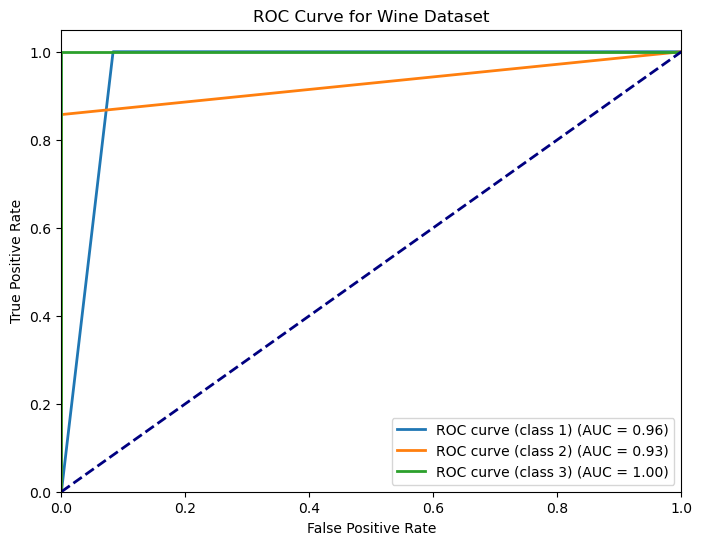

In [18]:
# 画出ROC曲线
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i + 1}) (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine Dataset')
plt.legend(loc='lower right')
plt.show()

### 拓展要求

 ROC曲线和AUC值对于多类别分类问题提供了一种综合性能评估的方法，但对于每个类别都有一个ROC曲线和AUC值。合理性在于：
 
 ROC曲线（Receiver Operating Characteristic Curve）是一种以假阳性率（False Positive Rate，FPR）为横轴，真阳性率（True Positive Rate，TPR）为纵轴的曲线。ROC曲线能够展示分类器在不同阈值下的性能表现。曲线越靠近左上角，表示分类器的性能越好。
 
 AUC值（Area Under the Curve）是ROC曲线下的面积，取值范围在0到1之间。AUC值越接近1，表示分类器的性能越好，能够更好地区分正例和负例。AUC值为0.5时，表示分类器的性能等同于随机猜测。

 合理性体现在以下几个方面:
 
 1. 不受阈值选择的影响：ROC曲线和AUC值不依赖于分类器的阈值选择，因此可以综合考虑分类器在不同阈值下的性能。这是因为ROC曲线绘制了不同阈值下的真阳性率和假阳性率之间的关系，而AUC值则是对整个曲线下的性能进行综合评估。这使得ROC曲线和AUC值能够提供一个更全面的分类器性能评估，而不仅仅局限于单个阈值的结果。

 2. 对类别不平衡数据的鲁棒性：在类别不平衡的情况下，分类器的性能评估可能会受到误导。例如，在一个正例数量远远小于负例数量的数据集中，一个简单的分类器可以将所有样本都预测为负例，仍然会有很高的准确率。然而，ROC曲线和AUC值能够更好地反映分类器在不同类别之间的区分能力，因为它们基于真阳性率和假阳性率的比例，而不是简单地依赖于分类器的准确率
 
 3. 直观可解释性：ROC曲线直观地展示了分类器在不同阈值下的性能变化。曲线越靠近左上角，表示分类器的性能越好。这使得我们可以通过观察曲线的形状来判断分类器的优劣。AUC值则提供了一个单一的指标来衡量分类器的整体性能，数值越接近1，表示分类器的性能越好。
 
 4. 与其他评价指标的关联性：ROC曲线和AUC值与其他评价指标（如准确率、召回率、精确度和F1分数）之间存在一定的关联性。例如，AUC值与准确率和召回率之间存在一定的权衡关系，因为AUC值综合考虑了分类器在不同阈值下的性能。这使得ROC曲线和AUC值能够提供一个更全面的分类器性能评估，而不仅仅依赖于单个评价指标